<script
  src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"
  type="text/javascript">
</script>

# What is a mode?

text text text
test $\sum$ test
$$\mathbf M \ddot{\mathbf x} + \mathbf K \mathbf x = \mathbf 0$$

20

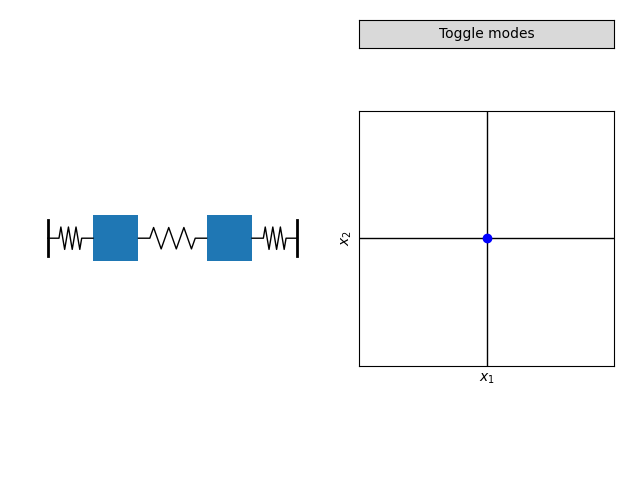

In [2]:
#--------------------------------------#
############### CONTROLS ############### 
# Left click in coordinate space to start simulation
# Left click outside coordinate space to pause/resume animation
# Right click anywhere to reset
#--------------------------------------#
## User settings
# System settings
m1 = 5 # Mass 1
m2 = 5 # Mass 2

k1 = 50  # Spring 1
k2 = 50  # Spring 2
k3 = 10  # Spring 3

# Animation settings
sim_time = 10  # Time of simulation
fps = 30   # Target FPS

# Plot settings
disp_limit = 2 # maximum displacement for x_1 and x_2

box_length = 4 # lumped mass square dimension


min_spring_length = 2 # when fully compressed, implies spring component length
num_spring_sections = 3 # number of zig-zags


modes_start_on = False #whether modal dispalcements are initially shown
button_text = "Toggle modes" 

# Plot style
spring_line_width = 1 

marker_colour = "b"
marker_size = 6

mode_colour = "r"
mode_marker_size = 4
axes_line_width = 1
#--------------------------------------#
#--------------------------------------#
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

from matplotlib.backend_bases import MouseButton
from matplotlib.patches import Rectangle
from matplotlib.widgets import Button

from functools import partial
#--------------------------------------#
## Equation of motion
M = np.diag([m1,m2])
K = np.array([[k1+k2,-k2],[-k2,k2+k3]])
(eigenvalues,eigenvectors) = np.linalg.eig(np.linalg.inv(M)@K)
natural_frequency = np.sqrt(eigenvalues)
num_time_points = fps*sim_time
t = np.linspace(0,sim_time,num_time_points)

def modal_to_physical(q):
    return eigenvectors@q

def physical_to_modal(x):
    return np.linalg.inv(eigenvectors)@x

def modal_displacement(t,initial_x):
    #assume initial velocity is always zero
    Q = physical_to_modal(initial_x)
    q = np.array([Q[0]*np.cos(natural_frequency[0]*t),
         Q[1]*np.cos(natural_frequency[1]*t)])
    return q
#--------------------------------------#
## Calculate system geometry
BOX_ONE_CENTRE = 0
box_distance = box_length + 2*disp_limit + min_spring_length
max_disp_left = BOX_ONE_CENTRE - disp_limit - min_spring_length
max_disp_right = BOX_ONE_CENTRE + box_length + box_distance + disp_limit + min_spring_length
system_disp_lims = [max_disp_left*1.02,max_disp_right*1.02]
#--------------------------------------#
## Setup figures
plt.close("all")
fig,([ax_placeholder,ax_button],[ax_system,ax_coords]) = plt.subplots(2,2,height_ratios=[1, 15])
fig.tight_layout(h_pad=-3)

ax_placeholder.axis("off")
#Mass spring system
ax_system.axis("off")
ax_system.set_aspect(1)

ax_system.set_xlim(system_disp_lims)
ax_system.set_ylim([0,box_length])

ground_style = dict(color="k",
                    linewidth = 2)
ground_length = 0.8*box_length
ground_y = [box_length/2 + ground_length/2,box_length/2 - ground_length/2]
ax_system.plot(2*[max_disp_left],ground_y,**ground_style)
ax_system.plot(2*[max_disp_right],ground_y,**ground_style)


#Coordinate space
ax_coords.set_label("coords")
ax_coords.set_xlabel("$x_1$")
ax_coords.set_ylabel("$x_2$")
ax_coords.set_xticks([])
ax_coords.set_yticks([])
ax_coords.set_aspect(1)

coord_lim = [-disp_limit,disp_limit]
ax_coords.set_xlim(coord_lim)
ax_coords.set_ylim(coord_lim)

physical_axes_style = dict(color = "k",
                           linewidth = axes_line_width)

ax_coords.plot(coord_lim,[0,0],**physical_axes_style)
ax_coords.plot([0,0],coord_lim,**physical_axes_style)

disp_end = np.array([disp_limit,disp_limit])
max_q = physical_to_modal(disp_end)
min_q = physical_to_modal(-disp_end)


scale_factors = [disp_limit/min(abs(eigenvector)) for eigenvector in eigenvectors]
eigen_xaxis = [scale_factor*eigenvector[0] for eigenvector,scale_factor in zip(eigenvectors.T,scale_factors)]
eigen_yaxis = [scale_factor*eigenvector[1] for eigenvector,scale_factor in zip(eigenvectors.T,scale_factors)]

eigen_axis_style = dict(linestyle = "--",
                        color = "k",
                        linewidth = axes_line_width,
                        visible = modes_start_on)
[mode_one_axis] = ax_coords.plot([eigen_xaxis[0],-eigen_xaxis[0]],[eigen_yaxis[0],-eigen_yaxis[0]],**eigen_axis_style)
[mode_two_axis] = ax_coords.plot([eigen_xaxis[1],-eigen_xaxis[1]],[eigen_yaxis[1],-eigen_yaxis[1]],**eigen_axis_style)

#Mode toggle butto
ax_button.set_label("button")
#ax_button = fig.add_axes([0.549,0.75,0.2,0.075],label="button")
mode_button = Button(ax_button,button_text)

#--------------------------------------#
## Plot initial data
marker_style = dict(color = marker_colour,
                    marker = "o",
                    linestyle = "none",
                    markersize = marker_size)

[coord_marker] = ax_coords.plot(0,0,zorder=10,**marker_style)


lumped_mass_shapes = [Rectangle((BOX_ONE_CENTRE+offset,0),box_length,box_length)
                     for offset in (0,box_distance)]

system_box_one = ax_system.add_patch(lumped_mass_shapes[0])
system_box_two = ax_system.add_patch(lumped_mass_shapes[1])



mode_one_xy = [eigen_xaxis[0]/scale_factors[0],eigen_yaxis[0]/scale_factors[0]]
mode_two_xy = [eigen_xaxis[1]/scale_factors[1],eigen_yaxis[1]/scale_factors[1]]

mode_marker_style = dict(color = mode_colour,
                         marker = "o",
                         markersize = mode_marker_size,
                         visible = modes_start_on)
[mode_one_marker] = ax_coords.plot(0,0,zorder=5,**mode_marker_style)
[mode_two_marker] = ax_coords.plot(0,0,zorder=5,**mode_marker_style)

mode_line_style = dict(color= mode_colour,
                       linewidth = axes_line_width,
                       linestyle = "-",
                       visible = modes_start_on)

[mode_one_line] = ax_coords.plot([0,0],[0,0],zorder=5,**mode_line_style)
[mode_two_line] = ax_coords.plot([0,0],[0,0],zorder=5,**mode_line_style)
#--------------------------------------#
## Springs
SPRING_SEQUENCE = [+1,-1,-1,+1] #defines direction of components in spring section 

num_components = len(SPRING_SEQUENCE) #num components (lines) per section
num_spring_points = 3+num_components*num_spring_sections
box_mid_height = [box_length/2]*2
component_length = min_spring_length/2

def get_spring_points(spring_ends_x,spring_ends_y,length):
    angle = np.arccos((length/component_length -2)/(num_components*num_spring_sections))
    spring_coords = np.zeros([2,num_spring_points])
    spring_coords[:,0] = [spring_ends_x[0],spring_ends_y[0]]
    spring_coords[:,1] = [spring_ends_x[0] + component_length,spring_ends_y[0]]
    
    spring_coords[:,-1] = [spring_ends_x[1],spring_ends_y[1]]
    spring_coords[:,-2] = [spring_ends_x[1] - component_length,spring_ends_y[1]]
    
    x_diff = component_length*np.cos(angle)
    y_diff = component_length*np.sin(angle)
    
    for iPoint in range(num_spring_points-3):
        direction = SPRING_SEQUENCE[iPoint%num_components]
        next_point = spring_coords[:,iPoint+1] + [x_diff,direction*y_diff]
        spring_coords[:,iPoint+2] = next_point
    
    return spring_coords


end_left = max_disp_left
box_one_left = system_box_one.get_xy()[0]
box_one_right = box_one_left + box_length
box_two_left = system_box_two.get_xy()[0]
box_two_right = box_two_left + box_length
end_right = max_disp_right

spring_one_length = disp_limit + min_spring_length
spring_two_length = box_distance-box_length
spring_three_length = spring_one_length

spring_one_points = get_spring_points([end_left,box_one_left],box_mid_height,spring_one_length)
spring_two_points = get_spring_points([box_one_right,box_two_left],box_mid_height,spring_two_length)
spring_three_points = get_spring_points([box_two_right,end_right],box_mid_height,spring_three_length)


spring_style = dict(linewidth = spring_line_width,
                    color = "k")

[spring_one] = ax_system.plot(spring_one_points[0],spring_one_points[1],**spring_style)
[spring_two] = ax_system.plot(spring_two_points[0],spring_two_points[1],**spring_style)
[spring_three] = ax_system.plot(spring_three_points[0],spring_three_points[1],**spring_style)


def update_spring_points(spring,x):
    x_data = spring.get_xdata()
    y_data = spring.get_ydata()
    
    component_length = x_data[1] - x_data[0]
    x_data[0] = x[0]
    x_data[-1] = x[1]
    
    x_data[1:-1] = np.linspace(x[0] + component_length,x[1] - component_length,num_spring_points - 2)
    spring.set_xdata(x_data)
    
    component_dx = abs(x_data[2] - x_data[1])
    if component_dx < component_length:
        component_dy = np.sqrt(component_length**2 - component_dx**2)
    else:
        component_dy = 0.01 #stops the spring getting stuck fully extended

    y0 = y_data[0]
    for iPoint in range(2,num_spring_points-2):
        if iPoint%2 == 1:
            continue
        if y_data[iPoint] < y0:
            y_data[iPoint] = y0 - component_dy
        elif y_data[iPoint] > y0:
            y_data[iPoint] = y0+component_dy
    spring.set_ydata(y_data)

#--------------------------------------#
## Setup animation
def update_animation(frame_id,x,orbit):
    x_1 = x[0,frame_id]
    x_2 = x[1,frame_id]
    
    x_data = orbit.get_xdata()
    y_data = orbit.get_ydata()
    
    x_data = np.append(x_data,x_1)
    y_data = np.append(y_data,x_2)
    
    orbit.set_data(x_data,y_data)
    
    update_system(x_1,x_2)
    plot_modal_coordinates(x_1,x_2)
    return orbit

def update_system(x_1,x_2):
    coord_marker.set_ydata([x_2])
    coord_marker.set_xdata([x_1])
    
    system_box_one.set_xy([x_1,0])
    system_box_two.set_xy([x_2+box_distance,0])
    
    x_spring_one = [end_left,x_1]
    x_spring_two = [x_1+box_length,x_2+box_distance]
    x_spring_three = [x_2+box_length+box_distance,end_right]
    
    update_spring_points(spring_one,x_spring_one)
    update_spring_points(spring_two,x_spring_two)
    update_spring_points(spring_three,x_spring_three)
    
def plot_modal_coordinates(x_1,x_2):
    q = physical_to_modal(([x_1,x_2]))
    
    mode_one_data = [q[0]*mode_one_coord for mode_one_coord in mode_one_xy] 
    mode_one_marker.set_xdata([mode_one_data[0]])
    mode_one_marker.set_ydata([mode_one_data[1]])
    
    mode_two_data = [q[1]*mode_two_coord for mode_two_coord in mode_two_xy] 
    mode_two_marker.set_xdata([mode_two_data[0]])
    mode_two_marker.set_ydata([mode_two_data[1]])
    
    mode_one_line.set_xdata([x_1,mode_one_data[0]])
    mode_one_line.set_ydata([x_2,mode_one_data[1]])
    
    mode_two_line.set_xdata([x_1,mode_two_data[0]])
    mode_two_line.set_ydata([x_2,mode_two_data[1]])

#--------------------------------------#
## Define interaction

class Button_interaction:
    modes_on = modes_start_on
    def button_pressed(self,event):
        self.modes_on = not self.modes_on
        
        mode_one_marker.set_visible(self.modes_on)
        mode_two_marker.set_visible(self.modes_on)
        mode_one_line.set_visible(self.modes_on)
        mode_two_line.set_visible(self.modes_on)
        mode_one_axis.set_visible(self.modes_on)
        mode_two_axis.set_visible(self.modes_on)
        
        event.canvas.draw()

class Animation_interaction:
    animation = []
    animation_paused = []
    def animation_exists(self):
        return self.animation and self.animation.event_source

    def pause_animation(self):
        if not self.animation_exists(): return

        self.animation.pause()
        self.animation_paused = True    
        
    def resume_animation(self):
        if not self.animation_exists(): return
        
        self.animation.resume()
        self.animation_paused = False
        
    def toggle_animation(self):
        if not self.animation_exists(): return
        
        if self.animation_paused: self.resume_animation()
        else: self.pause_animation()
    
    def on_mouse_move(self,event):
        if self.animation_exists(): return
        ax = event.inaxes
        if not ax: return
        if ax.get_label() != "coords": return
        
        x_1 = event.xdata
        x_2 = event.ydata
    
        update_system(x_1,x_2)
        plot_modal_coordinates(x_1,x_2)
        event.canvas.draw()
        
    def on_mouse_click(self,event):
        ax = event.inaxes
        if ax and ax.get_label() == "button": return
        
        if event.button is MouseButton.LEFT:
            ax = event.inaxes
            if not ax or ax.get_label() != "coords":
                self.toggle_animation()
                return
            
            #animate dynamics from selected initial condition
            self.pause_animation()
            x_1 = event.xdata
            x_2 = event.ydata
            
            q = modal_displacement(t, [x_1,x_2])
            x = modal_to_physical(q)
            
            [orbit] = ax_coords.plot([],[],label="orbit")
    
            self.animation = ani.FuncAnimation(fig, partial(update_animation,orbit = orbit,x=x),
                                          frames=range(num_time_points),interval = 1000/fps,repeat = False)
            self.animation_paused = False
            event.canvas.draw()
            
        elif event.button is MouseButton.RIGHT:
            #clear old animations
            self.pause_animation()
            if self.animation_exists(): self.animation = []
            
            lines = ax_coords.get_children()
            for line in lines:
                if line.get_label() == "orbit":
                    line.remove()
            
            if not ax or ax.get_label() != "coords":
                x_1,x_2 = [0,0]
            else:
                x_1,x_2 = [event.xdata,event.ydata]
                
            update_system(x_1,x_2)
            plot_modal_coordinates(x_1,x_2)
                
            event.canvas.draw()

def on_fig_close(event):
    plt.disconnect(mouse_move_binding_id)
    plt.disconnect(mouse_click_binding_id)
        
button_callback = Button_interaction()
mode_button.on_clicked(button_callback.button_pressed)

mouse_callback = Animation_interaction()
mouse_move_binding_id = plt.connect('motion_notify_event', mouse_callback.on_mouse_move)
mouse_click_binding_id = plt.connect('button_press_event', mouse_callback.on_mouse_click)
plt.connect('close_event', on_fig_close)

more text